# aneris_harm
## Purpose: Learn how to use the aneris tool for harmonization
- Starting with historical (1750-2022) and projected (2020-2100) datasets for CH4
    - Historical dataset is product of PRIMAP, CEDS, GCP, & GFED
    - Projected datasets are outputs of GCAM 6.0 NGFS and MESSAGEix-GLOBIOM (will focus on one at a time)
- Credit: Gidden, M. (2017). gidden/aneris: Initial release version for harmonization paper (v0.1.0). Zenodo. https://doi.org/10.5281/ZENODO.802832


## Erica Simon, 01/31/24

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import aneris
from aneris.tutorial import load_data

%matplotlib inline

## Import datasets

In [29]:
GCAM_proj_emis = pd.read_csv('~/outputs/NGFS_GCAM_cleaned.csv')
MSG_proj_emis = pd.read_csv('~/outputs/NGFS_MSG_cleaned.csv')

hist_emis = pd.read_csv('~/outputs/historical_emissions_ALL.csv')

## Visualize projected vs. historical CH4 emissions

This will help us to analyze the discrepancy between the two timeseries. Then, we can use the `aneris` harmonization tool to make these trajectories consistent with one another

In [30]:
ch4_proj = GCAM_proj_emis.loc[GCAM_proj_emis.Variable == 'CH4'].loc[GCAM_proj_emis.Scenario == 'Current Policies']
ch4_proj = ch4_proj.values[0][3:].astype(float)

In [31]:
ch4_proj

array([320.8162241, 332.3504848, 349.4731017, 370.7043309, 383.7314283,
       396.5458579, 406.4101421, 413.584382 , 416.1188587, 418.3506344,
       417.2221213, 415.408043 , 410.5150104, 406.2395599, 401.7712512,
       395.3983755, 388.6285407])

Projections are in 5-year timesteps, so we need to interpolate over the interval

In [32]:
yrs = np.arange(2020, 2101, 5)
all_yrs = np.arange(2020, 2101)

In [33]:
ch4_proj_interp = np.interp(all_yrs, yrs, ch4_proj)

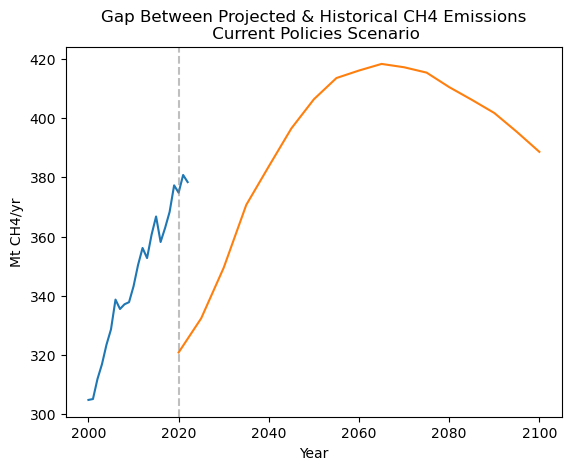

In [34]:
plt.plot(np.arange(2000, 2023), hist_emis.loc[hist_emis.variable == 'CH4'].values[0][252:])
plt.plot(np.arange(2020, 2101), ch4_proj_interp)
plt.axvline(2020, linestyle='--', color='grey', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Mt CH4/yr')
plt.title('Gap Between Projected & Historical CH4 Emissions\n Current Policies Scenario')
plt.show()